# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

## Dataset Info

* CLIENTNUM
  - Client number. Unique identifier for the customer holding the account

* Attrition_Flag (This is your target variable!)
  - Internal event (customer activity) variable - if the account is closed then 1 else 0

* Customer_Age
  - Demographic variable - Customer's Age in Years

* Gender
  - Demographic variable - M=Male, F=Female

* Dependent_count
  - Demographic variable - Number of dependents

* Education_Level
  - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)


* Marital_Status
  - Demographic variable - Married, Single, Divorced, Unknown

* Income_Category
  - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)


* Card_Category
  - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months_on_book
  - Period of relationship with bank


* Total_Relationship_Count
  - Total no. of products held by the customer

* Months_Inactive_12_mon
  - No. of months inactive in the last 12 months

* Contacts_Count_12_mon
  - No. of Contacts in the last 12 months

* Credit_Limit
  - Credit Limit on the Credit Card

* Total_Revolving_Bal
  - Total Revolving Balance on the Credit Card

* Avg_Open_To_Buy
  - Open to Buy Credit Line (Average of last 12 months)

* Total_Amt_Chng_Q4_Q1
  - Change in Transaction Amount (Q4 over Q1)

* Total_Trans_Amt
  - Total Transaction Amount (Last 12 months)

* Total_Trans_Ct
  - Total Transaction Count (Last 12 months)

* Total_Ct_Chng_Q4_Q1
  - Change in Transaction Count (Q4 over Q1)

* Avg_Utilization_Ratio
  - Average Card Utilization Ratio




# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier




from sklearn.model_selection import train_test_split

In [30]:
data = pd.read_csv('ChurnPrediction/churn-prediction.csv')

In [31]:
display(data)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0        3.900000e+01  ...                       1                      3   
1        4.400000e+01  ...                       1                      2   
2        3.600000e+01  ...                       1                      0   
3        3.400000e+01  ...                       4                      1   
4        2.100000e+01  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122    4.000000e+01  ...                       2                      3   
10123    2.500000e+01  ...                       2                      3   
10124    3.600000e+01  ...                       3                      4   
10125    2.147484e+09  ...                       3                      3   
10126    2.500000e+01  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

In [32]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [33]:
list_column = list(data.columns)
list_column

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

## 1. Data preprocessing, normalization, missing data, categorical data

In [64]:

from category_encoders.cat_boost import CatBoostEncoder

def one_hot_encode(df, column, prefix):# found this function which is b
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

def preprocess_data(df, scale=False, one_hot=False , age_groupe = False ):
    
    #drop ID - has only unique values
    df = df.drop('CLIENTNUM', axis=1)
    
    # if True create  Age_groupe
    if age_groupe == True:
        list_AgeGroup = [df]
        for column in list_AgeGroup:
            df.loc[column["Customer_Age"] < 18,  'age_group'] = 18
            df.loc[(column["Customer_Age"] >= 19) & (column["Customer_Age"] <= 29), 'age_group'] = 20
            df.loc[(column["Customer_Age"] >= 30) & (column["Customer_Age"] <= 39), 'age_group'] = 30
            df.loc[(column["Customer_Age"] >= 40) & (column["Customer_Age"] <= 49), 'age_group'] = 40
            df.loc[(column["Customer_Age"] >= 50) & (column["Customer_Age"] <= 59), 'age_group'] = 50
            df.loc[column["Customer_Age"] >= 60, 'age_group'] = 60
        
    
    # handle unknown values
    df['Income_Category'] = df['Income_Category'].replace('Unknown', np.NaN)
   
    
    # Fill ordinal missing values with modes ( Income_Category column)
    df['Income_Category'] = df['Income_Category'].fillna('Less than $40K')
    
    # handle unknown values of marital status
    df['Marital_Status'] = df['Marital_Status'].replace('Unknown', np.NaN)
    
    # Fill missing values with dominant value ( Marital_Status column)
    df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].value_counts().index[0])

    #Ordinal Variables Encoding

    Income_Category_map = {
    'Less than $40K' : 0,
    '$40K - $60K'    : 1,
    '$60K - $80K'    : 2,
    '$80K - $120K'   : 3,
    '$120K +'        : 4
    
    }
    Card_Category_map = {
    'Blue'     : 0,
    'Silver'   : 1,
    'Gold'     : 2,
    'Platinum' : 3
    }


    Attrition_Flag_map = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
    }

    # Too many Unknown value to exclude it
    Education_Level_map = {
    'Uneducated'    : 0,
    'High School'   : 1,
    'College'       : 2,
    'Graduate'      : 3,
    'Post-Graduate' : 4,
    'Doctorate'     : 5,
    'Unknown'       : 6
    }
    
    Gender_Map = {
        'M' : 0,
        'F' : 1
    }

    df.loc[:, 'Income_Category'] = df['Income_Category'].map(Income_Category_map)
    df.loc[:, 'Attrition_Flag'] = df['Attrition_Flag'].map(Attrition_Flag_map)
    df.loc[:, 'Education_Level'] = df['Education_Level'].map(Education_Level_map)
    df.loc[:, 'Gender'] = df['Gender'].map(Gender_Map)
    
    #encoding using the function above creating + deleting old columns
    if one_hot == True:
        
        df = one_hot_encode(df, 'Marital_Status', prefix='MS')
        df = one_hot_encode(df, 'Card_Category', prefix='CC')
    else:
        df.loc[:, 'Card_Category'] = df['Card_Category'].map(Card_Category_map)
    
    # Label Encoder
    le = LabelEncoder()
    
    # the remaining categorical data are 'objects' as datatyes
    categ = [x for x in df.columns if df[x].dtype == 'object']
    
    #fit_transform on each categorical column
    for a in categ:
        df.loc[:, a]=le.fit_transform(df.loc[:,a])
        
   
    #X["Total_Trans_Ct_Categorical"] = pd.cut(X.Total_Trans_Ct,bins = 16, labels = range(1,17)) 
    #X["Total_Trans_Amt_Categorical"] =pd.cut(X.Total_Trans_Amt,bins = 16, labels = range(1,17))

    
    
    
    y = df.Attrition_Flag 
    X = df.drop('Attrition_Flag', axis=1)
    
   
    
    
    #Scale X
    if scale == True:
        scaler = StandardScaler()
        ro_sc = RobustScaler()

        X_ =X.loc[:,['Customer_Age', 
                     'Dependent_count',
                     'Months_on_book', 
                     'Total_Relationship_Count',
                     'Months_Inactive_12_mon',
                     'Contacts_Count_12_mon',
                     'Credit_Limit',
                     'Total_Revolving_Bal',
                     'Avg_Open_To_Buy',
                     'Total_Amt_Chng_Q4_Q1',
                     'Total_Trans_Amt',
                     'Total_Trans_Ct', 
                     'Total_Ct_Chng_Q4_Q1',
                     'Avg_Utilization_Ratio']]
        
        X = X.drop(['Customer_Age',
                    'Dependent_count',
                    'Months_on_book',
                    'Total_Relationship_Count',
                    'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon',
                    'Credit_Limit',
                    'Total_Revolving_Bal',
                    'Avg_Open_To_Buy', 
                    'Total_Amt_Chng_Q4_Q1',
                    'Total_Trans_Amt',
                    'Total_Trans_Ct', 
                    'Total_Ct_Chng_Q4_Q1',
                    'Avg_Utilization_Ratio'], axis= 1)
    
        X_ = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)
        
        X = X.merge(X_, left_index = True, right_index = True)
        
        
        X_2 = X.loc[:,['Credit_Limit', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt' ]]
        X = X.drop(['Credit_Limit',  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt'], axis = 1)
        
        X_2 = pd.DataFrame(ro_sc.fit_transform(X_2), columns= X_2.columns)
        X = X.merge(X_2, left_index = True, right_index = True)
       
    
        #create bins for bimodal continious data
        X["Total_Trans_Ct_Categorical"] = pd.cut(X.Total_Trans_Ct,bins = 16, labels = range(1,17)) 
        X["Total_Trans_Amt_Categorical"] =pd.cut(X.Total_Trans_Amt,bins = 16, labels = range(1,17))

    
    return X, y


    

## CatBoost Encoding 

In [66]:
import category_encoders as ce
import pandas as pd

def cat_boost(df):
    
    
    # handle unknown values
    df['Income_Category'] = df['Income_Category'].replace('Unknown', np.NaN)
   
    
    # Fill ordinal missing values with modes ( Income_Category column)
    df['Income_Category'] = df['Income_Category'].fillna('Less than $40K')
    
    # handle unknown values of marital status
    df['Marital_Status'] = df['Marital_Status'].replace('Unknown', np.NaN)
    
    # Fill missing values with dominant value ( Marital_Status column)
    df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].value_counts().index[0])
    
    # drop ID - has only unique values
    df = df.drop('CLIENTNUM', axis=1)
    
    Attrition_Flag_map = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
    }
    
    df.loc[:, 'Attrition_Flag'] = df['Attrition_Flag'].map(Attrition_Flag_map)   
        
    y = df.Attrition_Flag 
    X = df.drop('Attrition_Flag', axis=1)
    
    columns = list(X.columns)
   
    # the remaining categorical data are 'objects' as datatyes
    categ = [x for x in df.columns if df[x].dtype == 'object']
    categ.append('Dependent_count')
    categ.append('Months_on_book')
    categ.append('Total_Relationship_Count')
    categ.append('Credit_Limit')

    numerical = list(set(columns) - set(categ))
    # Define catboost encoder
    cbe_encoder = ce.CatBoostEncoder()  
    
    df_cat = X.loc[:, categ]
    df_num = X.loc[:, numerical]
    X = X.drop(numerical, axis = 1)

    # Fit encoder and transform the features
    cbe_encoder.fit(X, y)
    X = cbe_encoder.transform(X)
    
    X = X.merge(df_num, left_index = True, right_index = True)

    
    return X, y

In [67]:
X, y= cat_boost(data)

In [68]:
display(X)

Gender  Dependent_count  Education_Level  Marital_Status  \
0      0.146155                3         0.152016        0.154159   
1      0.173570                5         0.155692        0.169412   
2      0.146155                3         0.155692        0.154159   
3      0.173570                4         0.152016        0.154159   
4      0.146155                3         0.159382        0.154159   
...         ...              ...              ...             ...   
10122  0.146155                2         0.155692        0.169412   
10123  0.146155                2         0.168527        0.161763   
10124  0.173570                1         0.152016        0.154159   
10125  0.146155                2         0.155692        0.154159   
10126  0.173570                2         0.155692        0.154159   

       Income_Category  Card_Category  Months_on_book  \
0             0.134826       0.160979    3.900000e+01   
1             0.170980       0.160979    4.400000e+01   
2             0.157657       0.160979    3.600000e+01   
3             0.170980       0.160979    3.400000e+01   
4             0.134826       0.160979    2.100000e+01   
...                ...            ...             ...   
10122         0.151402       0.160979    4.000000e+01   
10123         0.151402       0.160979    2.500000e+01   
10124         0.170980       0.160979    3.600000e+01   
10125         0.151402       0.160979    2.147484e+09   
10126         0.170980       0.147771    2.500000e+01   

       Total_Relationship_Count  Credit_Limit  Total_Trans_Ct  \
0                             5       12691.0              42   
1                             6        8256.0              33   
2                             4        3418.0              20   
3                             3        3313.0              20   
4                             5        4716.0              28   
...                         ...           ...             ...   
10122                         3        4003.0             117   
10123                         4        4277.0              69   
10124                         5        5409.0              60   
10125                         4        5281.0              62   
10126                         6       10388.0              61   

       Total_Amt_Chng_Q4_Q1  Months_Inactive_12_mon  Total_Revolving_Bal  \
0                     1.335                       1                  777   
1                     1.541                       1                  864   
2                     2.594                       1                    0   
3                     1.405                       4                 2517   
4                     2.175                       1                    0   
...                     ...                     ...                  ...   
10122                 0.703                       2                 1851   
10123                 0.804                       2                 2186   
10124                 0.819                       3                    0   
10125                 0.535                       3                    0   
10126                 0.703                       2                 1961   

       Customer_Age  Total_Trans_Amt  Total_Ct_Chng_Q4_Q1  \
0                45             1144                1.625   
1                49             1291                3.714   
2                51             1887                2.333   
3                40             1171                2.333   
4                40              816                2.500   
...             ...              ...                  ...   
10122            50            15476                0.857   
10123            41             8764                0.683   
10124            44            10291                0.818   
10125            30             8395                0.722   
10126            43            10294                0.649   

       Contacts_Count_12_mon  Avg_Open_To_Buy  Avg_Utilization_Ratio

## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

In [8]:
# UPDATED FUNCTION - set 2  paramaters to choose preferance of preprocessing 
# Set scale on TRUE to get scaled data
# Set one_hot on True to get Marital Status and CardCategory one hot encoded

#X, y = preprocess_data(data)
#X, y = preprocess_data(data, scale=False , one_hot=True)
X, y = preprocess_data(data, scale=True, one_hot=True)

In [9]:
X

Gender  Education_Level  Income_Category  MS_Divorced  MS_Married  \
0           0                1                2            0           1   
1           1                3                0            0           0   
2           0                3                3            0           1   
3           1                1                0            0           1   
4           0                0                2            0           1   
...       ...              ...              ...          ...         ...   
10122       0                3                1            0           0   
10123       0                6                1            1           0   
10124       1                1                0            0           1   
10125       0                3                1            0           1   
10126       1                3                0            0           1   

       MS_Single  CC_Blue  CC_Gold  CC_Platinum  CC_Silver  ...  \
0              0        1        0            0          0  ...   
1              1        1        0            0          0  ...   
2              0        1        0            0          0  ...   
3              0        1        0            0          0  ...   
4              0        1        0            0          0  ...   
...          ...      ...      ...          ...        ...  ...   
10122          1        1        0            0          0  ...   
10123          0        1        0            0          0  ...   
10124          0        1        0            0          0  ...   
10125          0        1        0            0          0  ...   
10126          0        0        0            0          1  ...   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Ct  \
0                -0.473422         0.488971       -0.973895   
1                -0.366667        -0.008486       -1.357340   
2                -1.426858        -0.445658       -1.911206   
3                 1.661686        -0.734100       -1.911206   
4                -1.426858        -0.302868       -1.570365   
...                    ...              ...             ...   
10122             0.844455        -0.584929        2.221481   
10123             1.255524        -0.591639        0.176440   
10124            -1.426858        -0.226632       -0.207005   
10125            -1.426858        -0.240713       -0.121795   
10126             0.979433         0.105372       -0.164400   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Credit_Limit  \
0                 3.834003              -0.775882      0.956476   
1                12.608573              -0.616276      0.435477   
2                 6.807864              -0.997155     -0.132863   
3                 6.807864               1.759686     -0.145198   
4                 7.509325              -0.997155      0.019618   
...                    ...                    ...           ...   
10122             0.608119               0.678714     -0.064141   
10123            -0.122745               0.856458     -0.031953   
10124             0.444305              -0.997155      0.101028   
10125             0.041070              -0.997155      0.085991   
10126            -0.265557              -0.311572      0.685932   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct_Categorical  \
0                  2.627193        -1.065558                           4   
1                  3.530702        -1.008702                           3   
2                  8.149123        -0.778186                           2   
3                  2.934211        -1.055115                           2   
4                  6.311404        -1.192419                           3   
...                     ...              ...                         ...   
10122             -0.144737         4.477664                          14   
10123              0.298246         1.881648                           8   
10124              0.364035         2.47224

## Model Selection

### Random Forrest Classifier

In [72]:

# evaluate random forest algorithm for classification

#Process data for Tree Based Alg.
#X, y = preprocess_data(data, scale=False, one_hot=False )

clf = RandomForestClassifier(max_depth=13, random_state=1)
clf.fit(X, y)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.962 (0.004)


### Logistic Regression Classifier

In [71]:
from sklearn.linear_model import LogisticRegression

# We reprocess data in favour for the classification algorithm
#X, y = preprocess_data(data , scale =True, one_hot= True)

LogReg_clf = LogisticRegression(random_state = 1)

#LogReg_clf.fit(X y)

#y_pred = LogReg_clf.predict(X_test)


n_scores = cross_val_score(LogReg_clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.839 (0.002)


Random Forrest > Logistic Regression

 ### DATA AUGMENTATION Balanceing data( I think )

In [24]:
#import math
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import BorderlineSMOTE
#from imblearn.over_sampling import ADASYN

#def smote(x, y):
    # Synthetic Minority Over-samping Technique
    # 
    # sampling_strategy: determines the portion of samples to 
    #                    generate with respect to the majority class
    # k_neighbors : number of neighbors to be considered for each sample
    
    # For this example, only 1% of minoirty samples are considered
#    k_neighbors = math.ceil(sum(y) * 0.01)
      
#    smote = SMOTE(sampling_strategy=1, 
              #    k_neighbors=k_neighbors)
#    x, y = smote.fit_resample(x, y)
    
 #   return x, y



IndentationError: unexpected indent (<ipython-input-24-e0e528571c9c>, line 17)

In [ ]:
#X, y = preprocess_data(data, scale=True, one_hot=True)
#X, y = smote(X, y)
#X.shape , y.shape

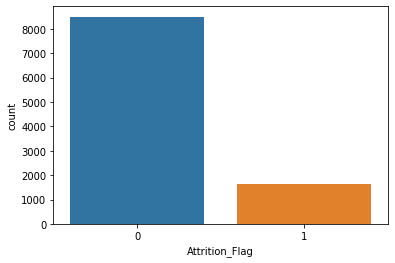

In [25]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#Check of the target has been balanced
#sns.countplot(y)
#plt.show()

### AdaBoost Classifier

In [70]:
# AdaBoost model
# We reprocess data in favour for the classification algorithm
#X, y = preprocess_data(data , scale =True, one_hot= True)

AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)


n_scores = cross_val_score(AdaBoost, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.962 (0.005)


### Gradient Boosting Classifier

In [69]:



X, y = cat_boost(data)

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=40, learning_rate = learning_rate, max_features=5, max_depth = 2, random_state = 0)
    gb.fit(X, y)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X, y)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X, y)))
    
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(gb, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Learning rate:  0.05
Accuracy score (training): 0.895
Accuracy score (validation): 0.895
Learning rate:  0.1
Accuracy score (training): 0.918
Accuracy score (validation): 0.918
Learning rate:  0.25
Accuracy score (training): 0.950
Accuracy score (validation): 0.950
Learning rate:  0.5
Accuracy score (training): 0.965
Accuracy score (validation): 0.965
Learning rate:  0.75
Accuracy score (training): 0.971
Accuracy score (validation): 0.971
Learning rate:  1
Accuracy score (training): 0.974
Accuracy score (validation): 0.974
Accuracy: 0.961 (0.005)


In [58]:
import xgboost as xgb

X, y = preprocess_data(data, scale=False, one_hot=False)


xgb = xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=0, eval_metric=["auc", "error", "error@0.6"])
xgb.fit(X, y)
    
    
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(gb, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

print(list(xgb.feature_importances_))


/Users/horiaiulian/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.961 (0.005)
[0.0430173, 0.046828456, 0.010248669, 0.0068939864, 0.016859286, 0.00606535, 0.006462697, 0.018125089, 0.11157398, 0.042091068, 0.02139624, 0.018861137, 0.19061784, 0.03386098, 0.034760736, 0.057178743, 0.26202667, 0.054443944, 0.018687813]


### Neural Networtks

In [ ]:
from sklearn.metrics import classification_report
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout


In [ ]:
model = keras.Sequential([
    Dense(52, activation='relu', input_dim=26),
    Dropout(0.5),
    
    Dense(52, activation='relu'),    
    Dropout(0.5),
    
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()



####


X, y = preprocess_data(data, scale=True, one_hot=True) 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train, batch_size=32, epochs=50,verbose=0)

from sklearn.metrics import classification_report


In [ ]:
prediction_nn = model.predict(X_test)
prediction_nn = [1 if y>=0.5 else 0 for y in prediction_nn]
print(classification_report(y_test, prediction_nn))

In [ ]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## 3. Classification models
- classical classification models
- deep neural networks

In [10]:

# data preparation as feature engineering with feature selection for wine dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# load the dataset


X, y = preprocess_data(data)
# transforms for the feature union
transforms = list()
transforms.append(('mms', MinMaxScaler()))
transforms.append(('ss', StandardScaler()))
transforms.append(('rs', RobustScaler()))
transforms.append(('qt', QuantileTransformer(n_quantiles=100, output_distribution='normal')))
transforms.append(('kbd', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')))
transforms.append(('pca', PCA(n_components=7)))
transforms.append(('svd', TruncatedSVD(n_components=7)))
# create the feature union
fu = FeatureUnion(transforms)
# define the feature selection
rfe = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=15)
# define the model
model = LogisticRegression(solver='liblinear')
# define the pipeline
steps = list()
steps.append(('fu', fu))
steps.append(('rfe', rfe))
steps.append(('m', model))
pipeline = Pipeline(steps=steps)
# define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))



Accuracy: 0.845 (0.017)


## 4. Evaluation and comparisons, various metrics

## 5. Hyperparameter Optimization

In [70]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid
#

X, y = preprocess_data(data, scale=False, one_hot=False)

#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

parameters = {'n_estimators' : [50,100,150,200,250,300],
              'min_samples_split' : [0.2, 0.4, 0.6, 0.8, 1.0, 2]
              'learning_rate' : [0.01, 0.1, 1],
              'max_depth' : [1,2,3,4,5,7],
              'random_state':[0]}
#
# Create an instance of GridSearch Cross-validation estimator
#
gsRFC = GridSearchCV(estimator=gb,
                     param_grid = parameters,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the RandomForestClassifier
#
gsRFC = gsRFC.fit(X_train, y_train)
#
# Print the training score of the best model
#
print(gsRFC.best_score_)
#
# Print the model parameters of the best model
#
print(gsRFC.best_params_)
#
# Print the test score of the best model
#
clfRFC = gsRFC.best_estimator_
print('Test accuracy: %.3f' % clfRFC.score(X_test, y_test))

0.9749417728455952
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'random_state': 0}
Test accuracy: 0.968


In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



parameters = {'n_estimators' : [150,200,250,300],
            'min_samples_split' : [0.2, 0.4, 0.6, 0.8, 1.0, 2], 
            'learning_rate' : [0.01, 0.1, 1], 
            'max_features':[None, 'log2', 'sqrt'], 
            'max_depth' : [1,2,3,4,5,7],

                 'random_state':[0]}



X, y = preprocess_data(data, scale=False, one_hot=False)
gb = GradientBoostingClassifier()
clf = GridSearchCV(estimator=gb, param_grid=parameters,scoring='accuracy',cv=cv, verbose = 2)
clf.fit(X,y)
sorted(clf.cv_results_.keys())
print(clf.best_score_)
print(clf.best_params_)






import pickle
pickle.dump(clf, open('grid_search.sav', 'wb'))

grid_search_clf = pickle.load(open('grid_search.sav', 'rb'))

Fitting 30 folds for each of 1296 candidates, totalling 38880 fits
[CV] END learning_rate=0.01, max_depth=1, max_features=None, min_samples_split=0.2, n_estimators=150, random_state=0; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=1, max_features=None, min_samples_split=0.2, n_estimators=150, random_state=0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=1, max_features=None, min_samples_split=0.2, n_estimators=150, random_state=0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=1, max_features=None, min_samples_split=0.2, n_estimators=150, random_state=0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=1, max_features=None, min_samples_split=0.2, n_estimators=150, random_state=0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=1, max_features=None, min_samples_split=0.2, n_estimators=150, random_state=0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=1, max_features=None, min_samples_split=0.2, n_estimators=150, random_st

In [46]:
grid_search_clf.best_estimator_ ,grid_search_clf.best_params_ ,grid_search_clf.score, grid_search_clf.best_score_ ,grid_search_clf.refit_time_

(GradientBoostingClassifier(max_depth=5, max_features='log2', n_estimators=300,
                            random_state=0),
 {'learning_rate': 0.1,
  'max_depth': 5,
  'max_features': 'log2',
  'min_samples_split': 2,
  'n_estimators': 300,
  'random_state': 0},
 <bound method BaseSearchCV.score of GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
              estimator=GradientBoostingClassifier(),
              param_grid={'learning_rate': [0.01, 0.1, 1],
                          'max_depth': [1, 2, 3, 4, 5, 7],
                          'max_features': [None, 'log2', 'sqrt'],
                          'min_samples_split': [0.2, 0.4, 0.6, 0.8, 1.0, 2],
                          'n_estimators': [150, 200, 250, 300],
                          'random_state': [0]},
              scoring='accuracy', verbose=2)>,
 0.9736351670705077,
 2.6536881923675537)

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

In [59]:
#X, y = preprocess_data(data, scale=False, one_hot=False)

learning_rates = [0.1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=300, learning_rate = learning_rate, max_features='log2', max_depth = 5, random_state = 0)
    gb.fit(X, y)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X, y)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X, y)))
    
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(gb, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


gb.

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Accuracy: 0.974 (0.004)


AttributeError: 'GradientBoostingClassifier' object has no attribute 'tree_'

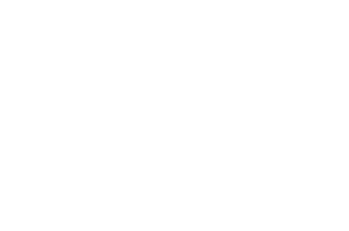

In [62]:
from sklearn.esemble import 

plot_tree(gb)

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect